# Energy Consumption of Household Appliances

Import necessary library

In [144]:
import pandas as pd

Load the dataset

In [145]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEP 769 CPS/HomeC.csv')
df.head()

<ipython-input-145-47279a094d63>:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEP 769 CPS/HomeC.csv')


time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26   1016.91   
1          0.006983  ...        10.0    Clear                29.26   1016.91   
2          0.006983  ...        10.0    Clear                29.26   1016.91   
3          0.006983  ...        10.0    Clear                29.26   1016.91   
4          0.006850  ...        10.0    Clear                29.26   1016.91   

   windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0       9.18  cloudCover        282.0              0.0      24.4   
1       9.18  cloudCover        282.0              0.0      24.4   
2       9.18  cloudCover        282.0              0.0      24.4   
3       9.18  cloudCover        282.0              0.0      24.4   
4       9.18  cloudCover        282.0              0.0      24.4   

   precipProbability  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 32 columns]

## Data Preprocessing

Display column names, data types, and the number of non-null values for each column

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

Display descriptive statistics for the dataset

In [147]:
df.describe()

use [kW]       gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  503910.000000  503910.000000       503910.000000    503910.000000   
mean        0.858962       0.076229            0.858962         0.031368   
std         1.058207       0.128428            1.058207         0.190951   
min         0.000000       0.000000            0.000000         0.000000   
25%         0.367667       0.003367            0.367667         0.000000   
50%         0.562333       0.004283            0.562333         0.000017   
75%         0.970250       0.083917            0.970250         0.000233   
max        14.714567       0.613883           14.714567         1.401767   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]    Fridge [kW]  \
count   503910.000000   503910.000000     503910.000000  503910.000000   
mean         0.099210        0.136779          0.081287       0.063556   
std          0.169059        0.178631          0.104466       0.076199   
min          0.000017        0.000067          0.000083       0.000067   
25%          0.020233        0.064400          0.040383       0.005083   
50%          0.020617        0.066633          0.042217       0.005433   
75%          0.068733        0.080633          0.068283       0.125417   
max          1.934083        0.794933          0.971750       0.851267   

       Wine cellar [kW]  Garage door [kW]  ...    temperature       humidity  \
count     503910.000000     503910.000000  ...  503910.000000  503910.000000   
mean           0.042137          0.014139  ...      50.741935       0.664085   
std            0.057967          0.014292  ...      19.113807       0.194389   
min            0.000017          0.000017  ...     -12.640000       0.130000   
25%            0.007133          0.012733  ...      35.770000       0.510000   
50%            0.008083          0.012933  ...      50.320000       0.680000   
75%            0.053192          0.013100  ...      66.260000       0.840000   
max            1.273933          1.088983  ...      93.720000       0.980000   

          visibility  apparentTemperature       pressure      windSpeed  \
count  503910.000000        503910.000000  503910.000000  503910.000000   
mean        9.253444            48.263382    1016.301625       6.649936   
std         1.611186            22.027916       7.895185       3.982716   
min         0.270000           -32.080000     986.400000       0.000000   
25%         9.420000            31.090000    1011.290000       3.660000   
50%        10.000000            50.320000    1016.530000       5.930000   
75%        10.000000            66.260000    1021.480000       8.940000   
max        10.000000           101.120000    1042.460000      22.910000   

         windBearing  precipIntensity       dewPoint  precipProbability  
count  503910.000000    503910.000000  503910.000000      503910.000000  
mean      202.356843         0.002598      38.694013           0.056453  
std       106.520474         0.011257      19.087939           0.165836  
min         0.000000         0.000000     -27.240000           0.000000  
25%       148.000000         0.000000      24.600000           0.000000  
50%       208.000000         0.000000      39.030000           0.000000  
75%       295.000000         0.000000      54.790000           0.000000  
max       359.000000         0.191000      75.490000           0.840000  

[8 rows x 28 columns]

Histogram of the target variable 'House overall [kW]'

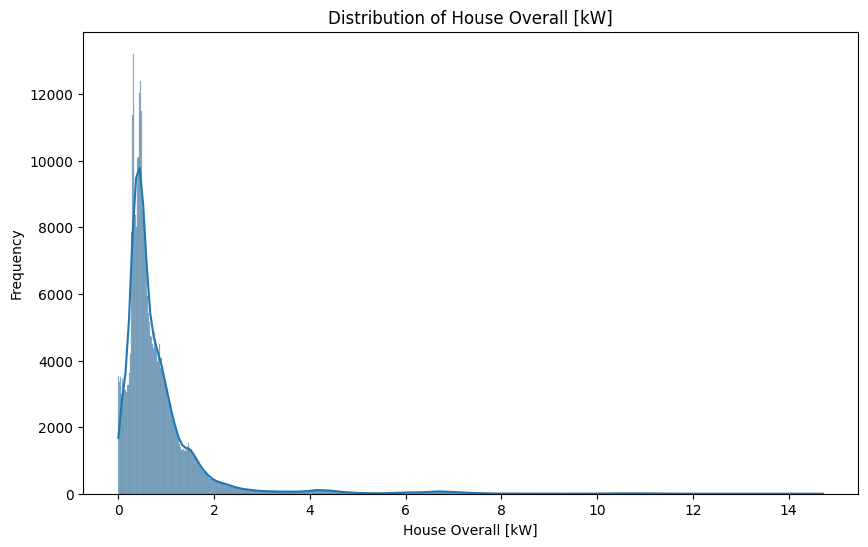

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the target variable 'House overall [kW]'
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a histogram with a KDE line
sns.histplot(df['House overall [kW]'], kde=True)

# Adding title and labels to the plot
plt.title('Distribution of House Overall [kW]')
plt.xlabel('House Overall [kW]')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Check for Null values in the dataset

In [149]:
df.isnull().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [150]:
df.isna().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

Display the count of unique values in the 'cloudCover' column, reason being it's dtype, which is 'object'

In [151]:
df['cloudCover'].value_counts()

cloudCover
0.0     63596
0.31    48101
1.0     47255
0.03    33186
0.04    23711
        ...  
0.54       58
0.35       58
0.17       58
0.44       58
0.59       57
Name: count, Length: 118, dtype: int64

From the value counts, we can see that there is a string value called 'cloudCover' which occurs 58 times in the whole dataset.

Now, we replace the string value with the mode value of the column for consistency

In [152]:
# Replace the string 'cloudCover' with NaN
df['cloudCover'] = pd.to_numeric(df['cloudCover'], errors='coerce')

# Fill NaN values with the mode of the column
df['cloudCover'].fillna(df['cloudCover'].mode()[0])

# Verify the changes
df['cloudCover'].value_counts()

cloudCover
0.00    68236
0.31    49899
1.00    48705
0.03    33940
0.04    24117
        ...  
0.71      114
0.64      114
0.56       58
0.53       58
0.59       57
Name: count, Length: 77, dtype: int64

Display the count of unique values in the 'summary' column (dtype is object)

In [153]:
df['summary'].value_counts()

summary
Clear                       376730
Partly Cloudy                62268
Light Rain                   27368
Drizzle                      10370
Overcast                      6041
Rain                          5169
Mostly Cloudy                 4548
Light Snow                    4323
Flurries                      1789
Breezy                        1561
Snow                          1152
Breezy and Partly Cloudy      1041
Foggy                          974
Rain and Breezy                174
Heavy Snow                     171
Flurries and Breezy            115
Breezy and Mostly Cloudy        58
Dry                             58
Name: count, dtype: int64

'summary' feature contains categorical values, so we encode the values using one hot encoding

In [154]:
# One-hot encode the 'summary' column
df_summary_encoded = pd.get_dummies(df, columns=['summary'], prefix='summary')

# Displaying the first few rows of the dataframe after encoding to verify the changes
df_summary_encoded.head()

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  summary_Foggy  summary_Heavy Snow  \
0          0.006983  ...          False               False   
1          0.006983  ...          False               False   
2          0.006983  ...          False               False   
3          0.006983  ...          False               False   
4          0.006850  ...          False               False   

   summary_Light Rain  summary_Light Snow  summary_Mostly Cloudy  \
0               False               False                  False   
1               False               False                  False   
2               False               False                  False   
3               False               False                  False   
4               False               False                  False   

   summary_Overcast  summary_Partly Cloudy  summary_Rain  \
0             False                  False         False   
1             False                  False         False   
2             False                  False         False   
3             False                  False         False   
4             False                  False         False   

   summary_Rain and Breezy  summary_Snow  
0                    False         False  
1                    False         False  
2                    False         False  
3                    False         False  
4                    False         False  

[5 rows x 49 columns]

Display the count of unique values in the 'icon' column (dtype is object)

In [155]:
df_summary_encoded['icon'].value_counts()

icon
clear-night            194536
clear-day              182252
rain                    43081
partly-cloudy-day       39492
partly-cloudy-night     27324
snow                     7550
cloudy                   6041
wind                     2660
fog                       974
Name: count, dtype: int64

'icon' feature contains categorical values, so we encode the values using one hot encoding

In [156]:
# One-hot encode the 'icon' column
df_summary_icon_encoded = pd.get_dummies(df_summary_encoded, columns=['icon'], prefix='icon')

# Displaying the first few rows of the dataframe after encoding to verify the changes
df_summary_icon_encoded.head()

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  summary_Snow  icon_clear-day  icon_clear-night  \
0          0.006983  ...         False           False              True   
1          0.006983  ...         False           False              True   
2          0.006983  ...         False           False              True   
3          0.006983  ...         False           False              True   
4          0.006850  ...         False           False              True   

   icon_cloudy  icon_fog  icon_partly-cloudy-day  icon_partly-cloudy-night  \
0        False     False                   False                     False   
1        False     False                   False                     False   
2        False     False                   False                     False   
3        False     False                   False                     False   
4        False     False                   False                     False   

   icon_rain  icon_snow  icon_wind  
0      False      False      False  
1      False      False      False  
2      False      False      False  
3      False      False      False  
4      False      False      False  

[5 rows x 57 columns]

Identifying non-numeric values in the 'time' column

This will help in detecting any values that need to be converted or handled before further processing

In [157]:
non_numeric_time_values = df_summary_icon_encoded['time'][~df_summary_icon_encoded['time'].apply(lambda x: str(x).isdigit())]
non_numeric_time_values

503910    \
Name: time, dtype: object

Remove or replace non-numeric values in the 'time' column

In [158]:
df_summary_icon_encoded['time'] = pd.to_numeric(df_summary_icon_encoded['time'], errors='coerce')

Verify the changes

In [159]:
print(df_summary_icon_encoded['time'].dtype)
print(df_summary_icon_encoded['time'].isnull().sum())

float64
1


Fill the NaN values if any, after conversion

Here, we fill it using median value of the column

In [160]:
df_summary_icon_encoded['time'].fillna(df_summary_icon_encoded['time'].median(), inplace=True)

Verify the column again

In [161]:
print(df_summary_icon_encoded['time'].dtype)
print(df_summary_icon_encoded['time'].isnull().sum())

float64
0


Recheking the features after encoding

In [162]:
df_summary_icon_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 57 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   time                              503911 non-null  float64
 1   use [kW]                          503910 non-null  float64
 2   gen [kW]                          503910 non-null  float64
 3   House overall [kW]                503910 non-null  float64
 4   Dishwasher [kW]                   503910 non-null  float64
 5   Furnace 1 [kW]                    503910 non-null  float64
 6   Furnace 2 [kW]                    503910 non-null  float64
 7   Home office [kW]                  503910 non-null  float64
 8   Fridge [kW]                       503910 non-null  float64
 9   Wine cellar [kW]                  503910 non-null  float64
 10  Garage door [kW]                  503910 non-null  float64
 11  Kitchen 12 [kW]                   503910 non-null  f

Moving onto the other numerical features which contains NaN values

In [163]:
# Dropping columns with too many missing values
# The threshold is set to 50%, meaning any column with more than 50% missing values will be dropped from the dataframe.
threshold = len(df_summary_icon_encoded) * 0.5

# Dropping the columns that do not meet the threshold
data_encoded = df_summary_icon_encoded.dropna(thresh=threshold, axis=1)


Filling missing values with the mean for numerical columns

In [164]:
# Selecting numerical columns with data type 'float64'
# This step identifies all numerical columns in the dataframe for further processing.
numerical_columns = data_encoded.select_dtypes(include=['float64']).columns

# Filling missing values in numerical columns with the mean of each column
data_encoded[numerical_columns] = data_encoded[numerical_columns].fillna(data_encoded[numerical_columns].mean())

Verify if there are still any missing values

In [165]:
missing_values_after_cleaning = data_encoded.isnull().sum()
print("Missing values after cleaning:\n", missing_values_after_cleaning)

Missing values after cleaning:
 time                                0
use [kW]                            0
gen [kW]                            0
House overall [kW]                  0
Dishwasher [kW]                     0
Furnace 1 [kW]                      0
Furnace 2 [kW]                      0
Home office [kW]                    0
Fridge [kW]                         0
Wine cellar [kW]                    0
Garage door [kW]                    0
Kitchen 12 [kW]                     0
Kitchen 14 [kW]                     0
Kitchen 38 [kW]                     0
Barn [kW]                           0
Well [kW]                           0
Microwave [kW]                      0
Living room [kW]                    0
Solar [kW]                          0
temperature                         0
humidity                            0
visibility                          0
apparentTemperature                 0
pressure                            0
windSpeed                           0
cloudCover        

Visualize the pairplot of selected features

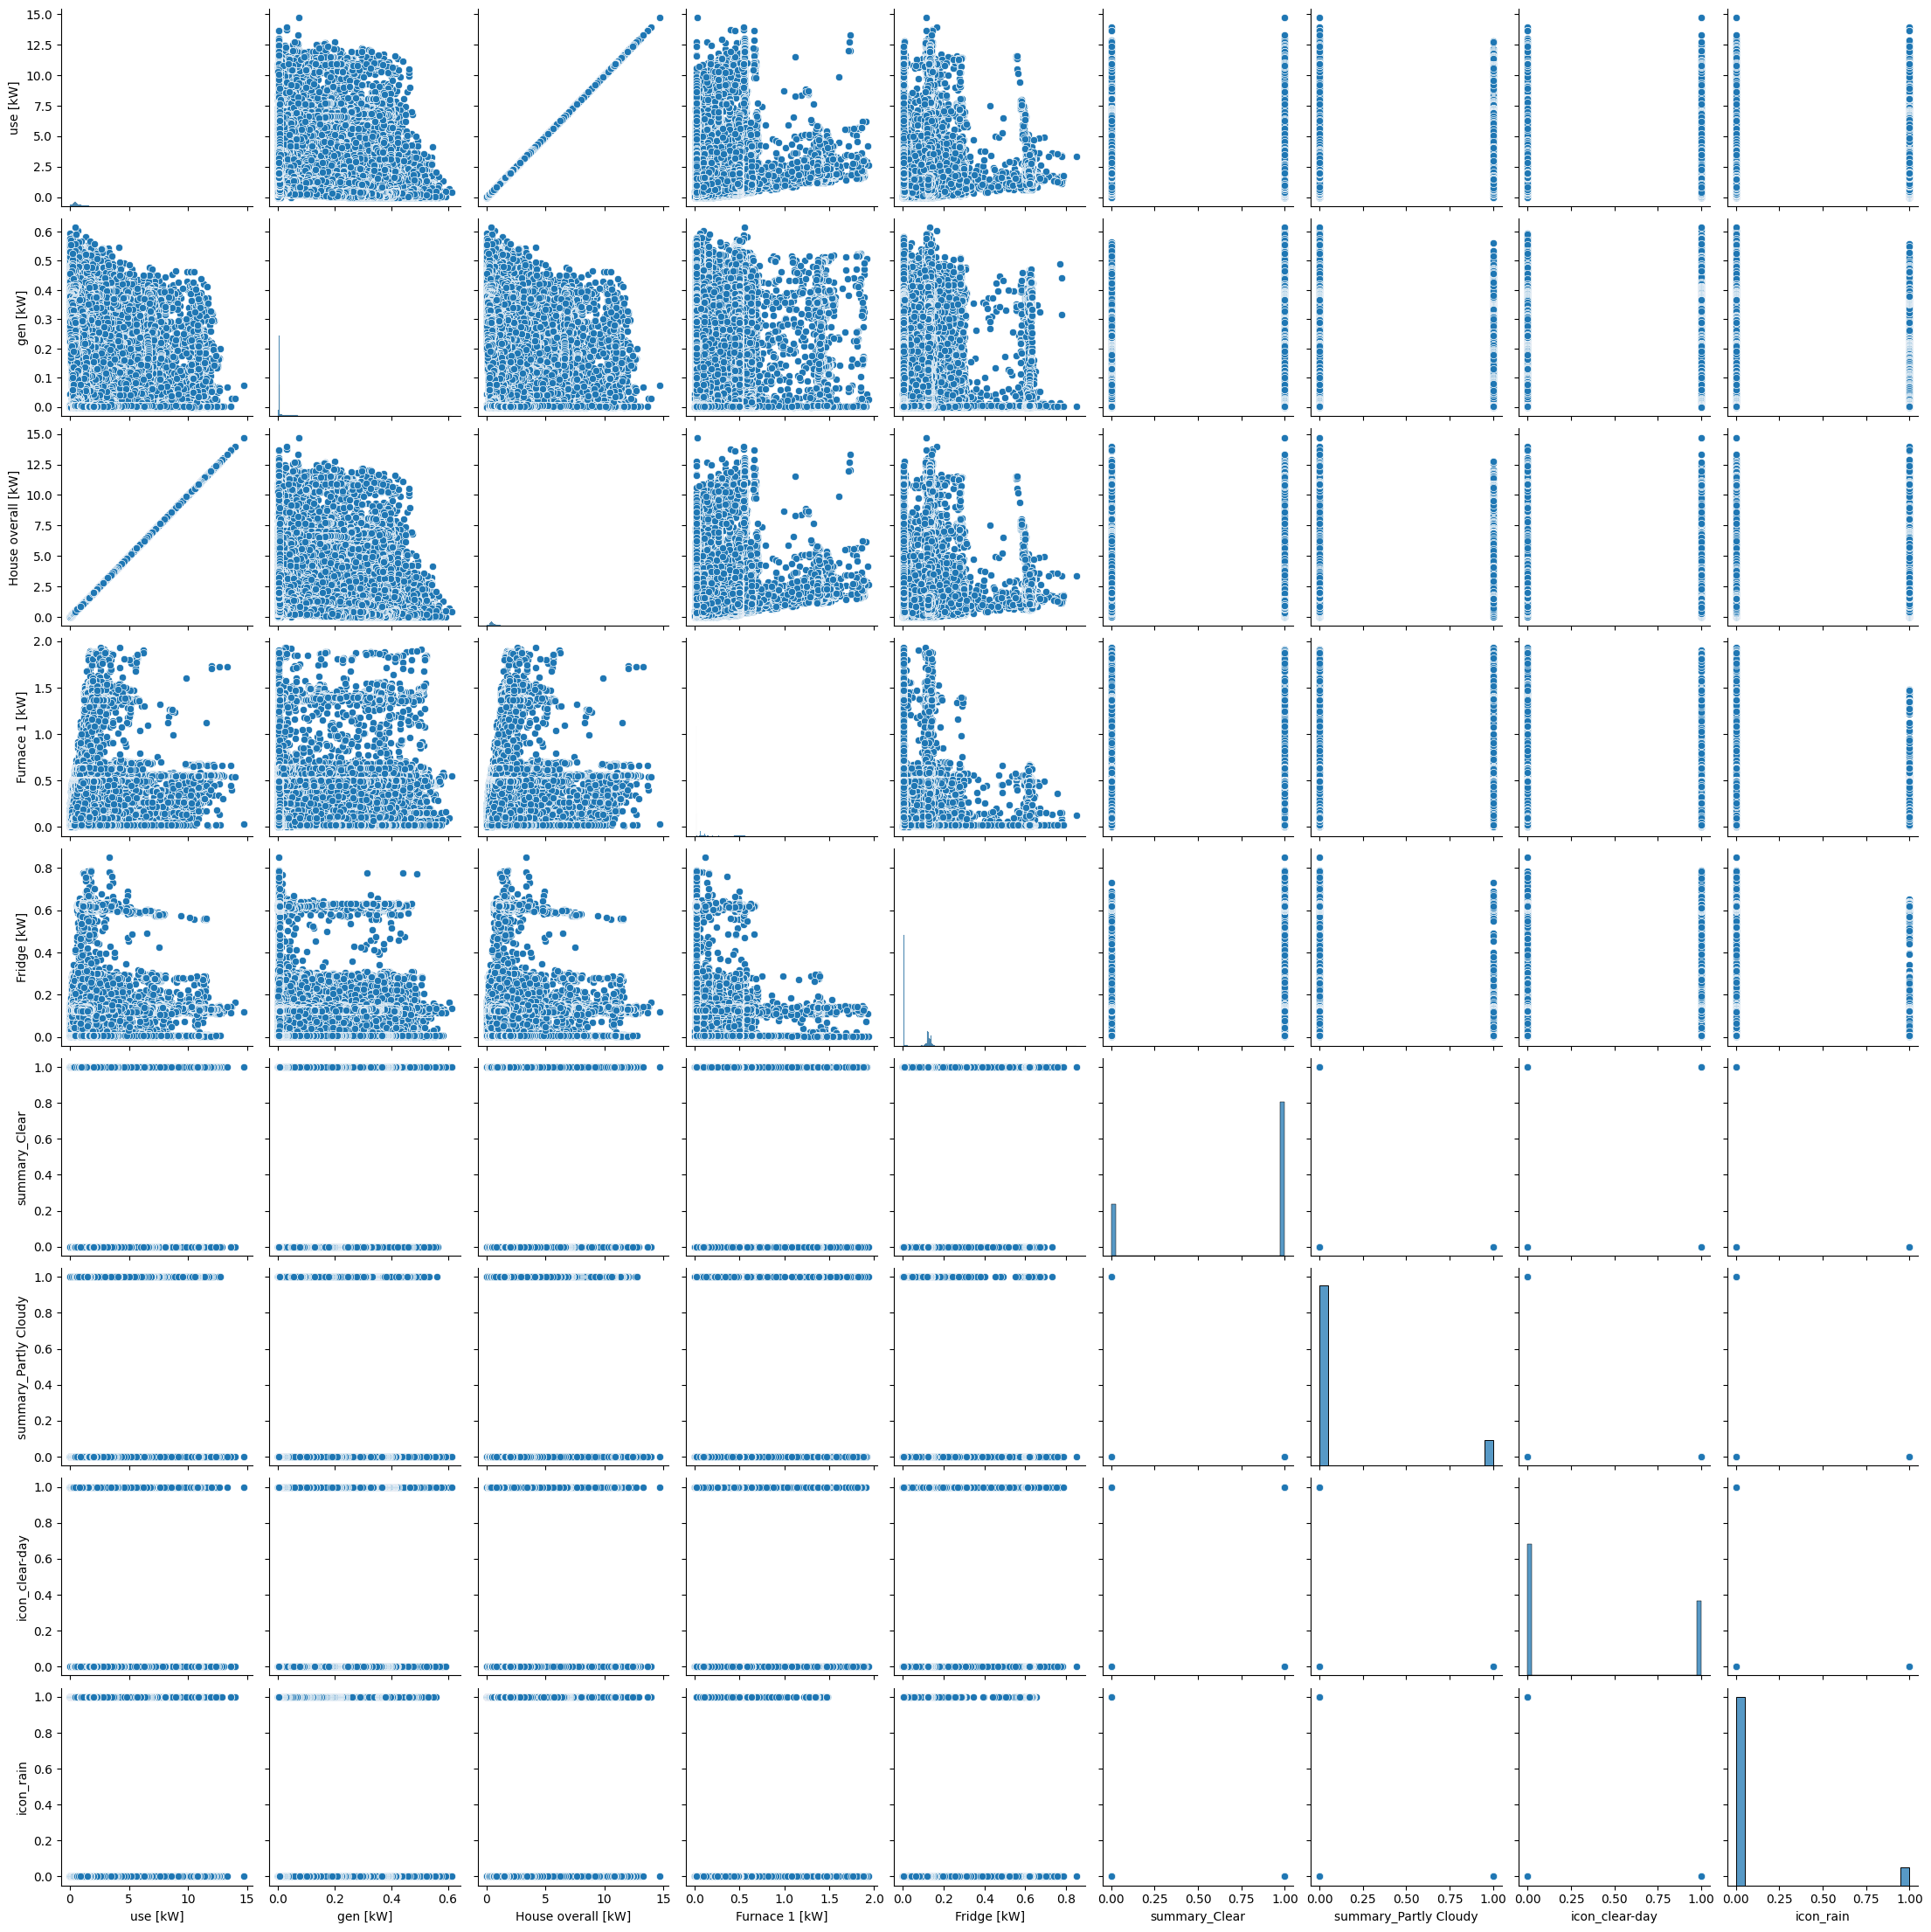

In [166]:
# Pairplot of selected features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_features = [
    'use [kW]', 'gen [kW]', 'House overall [kW]',
    'Furnace 1 [kW]', 'Fridge [kW]',
    'summary_Clear', 'summary_Partly Cloudy',
    'icon_clear-day', 'icon_rain'
]

# Generate pairplot using seaborn
sns.pairplot(data_encoded[selected_features])

# Display the plot
plt.show()

Generate a correlation heatmap

This heatmap visualizes the correlation matrix, showing the relationship between different numerical features.

The correlation values range from -1 to 1, where 1 indicates a perfect positive correlation and -1 indicates a perfect negative correlation.


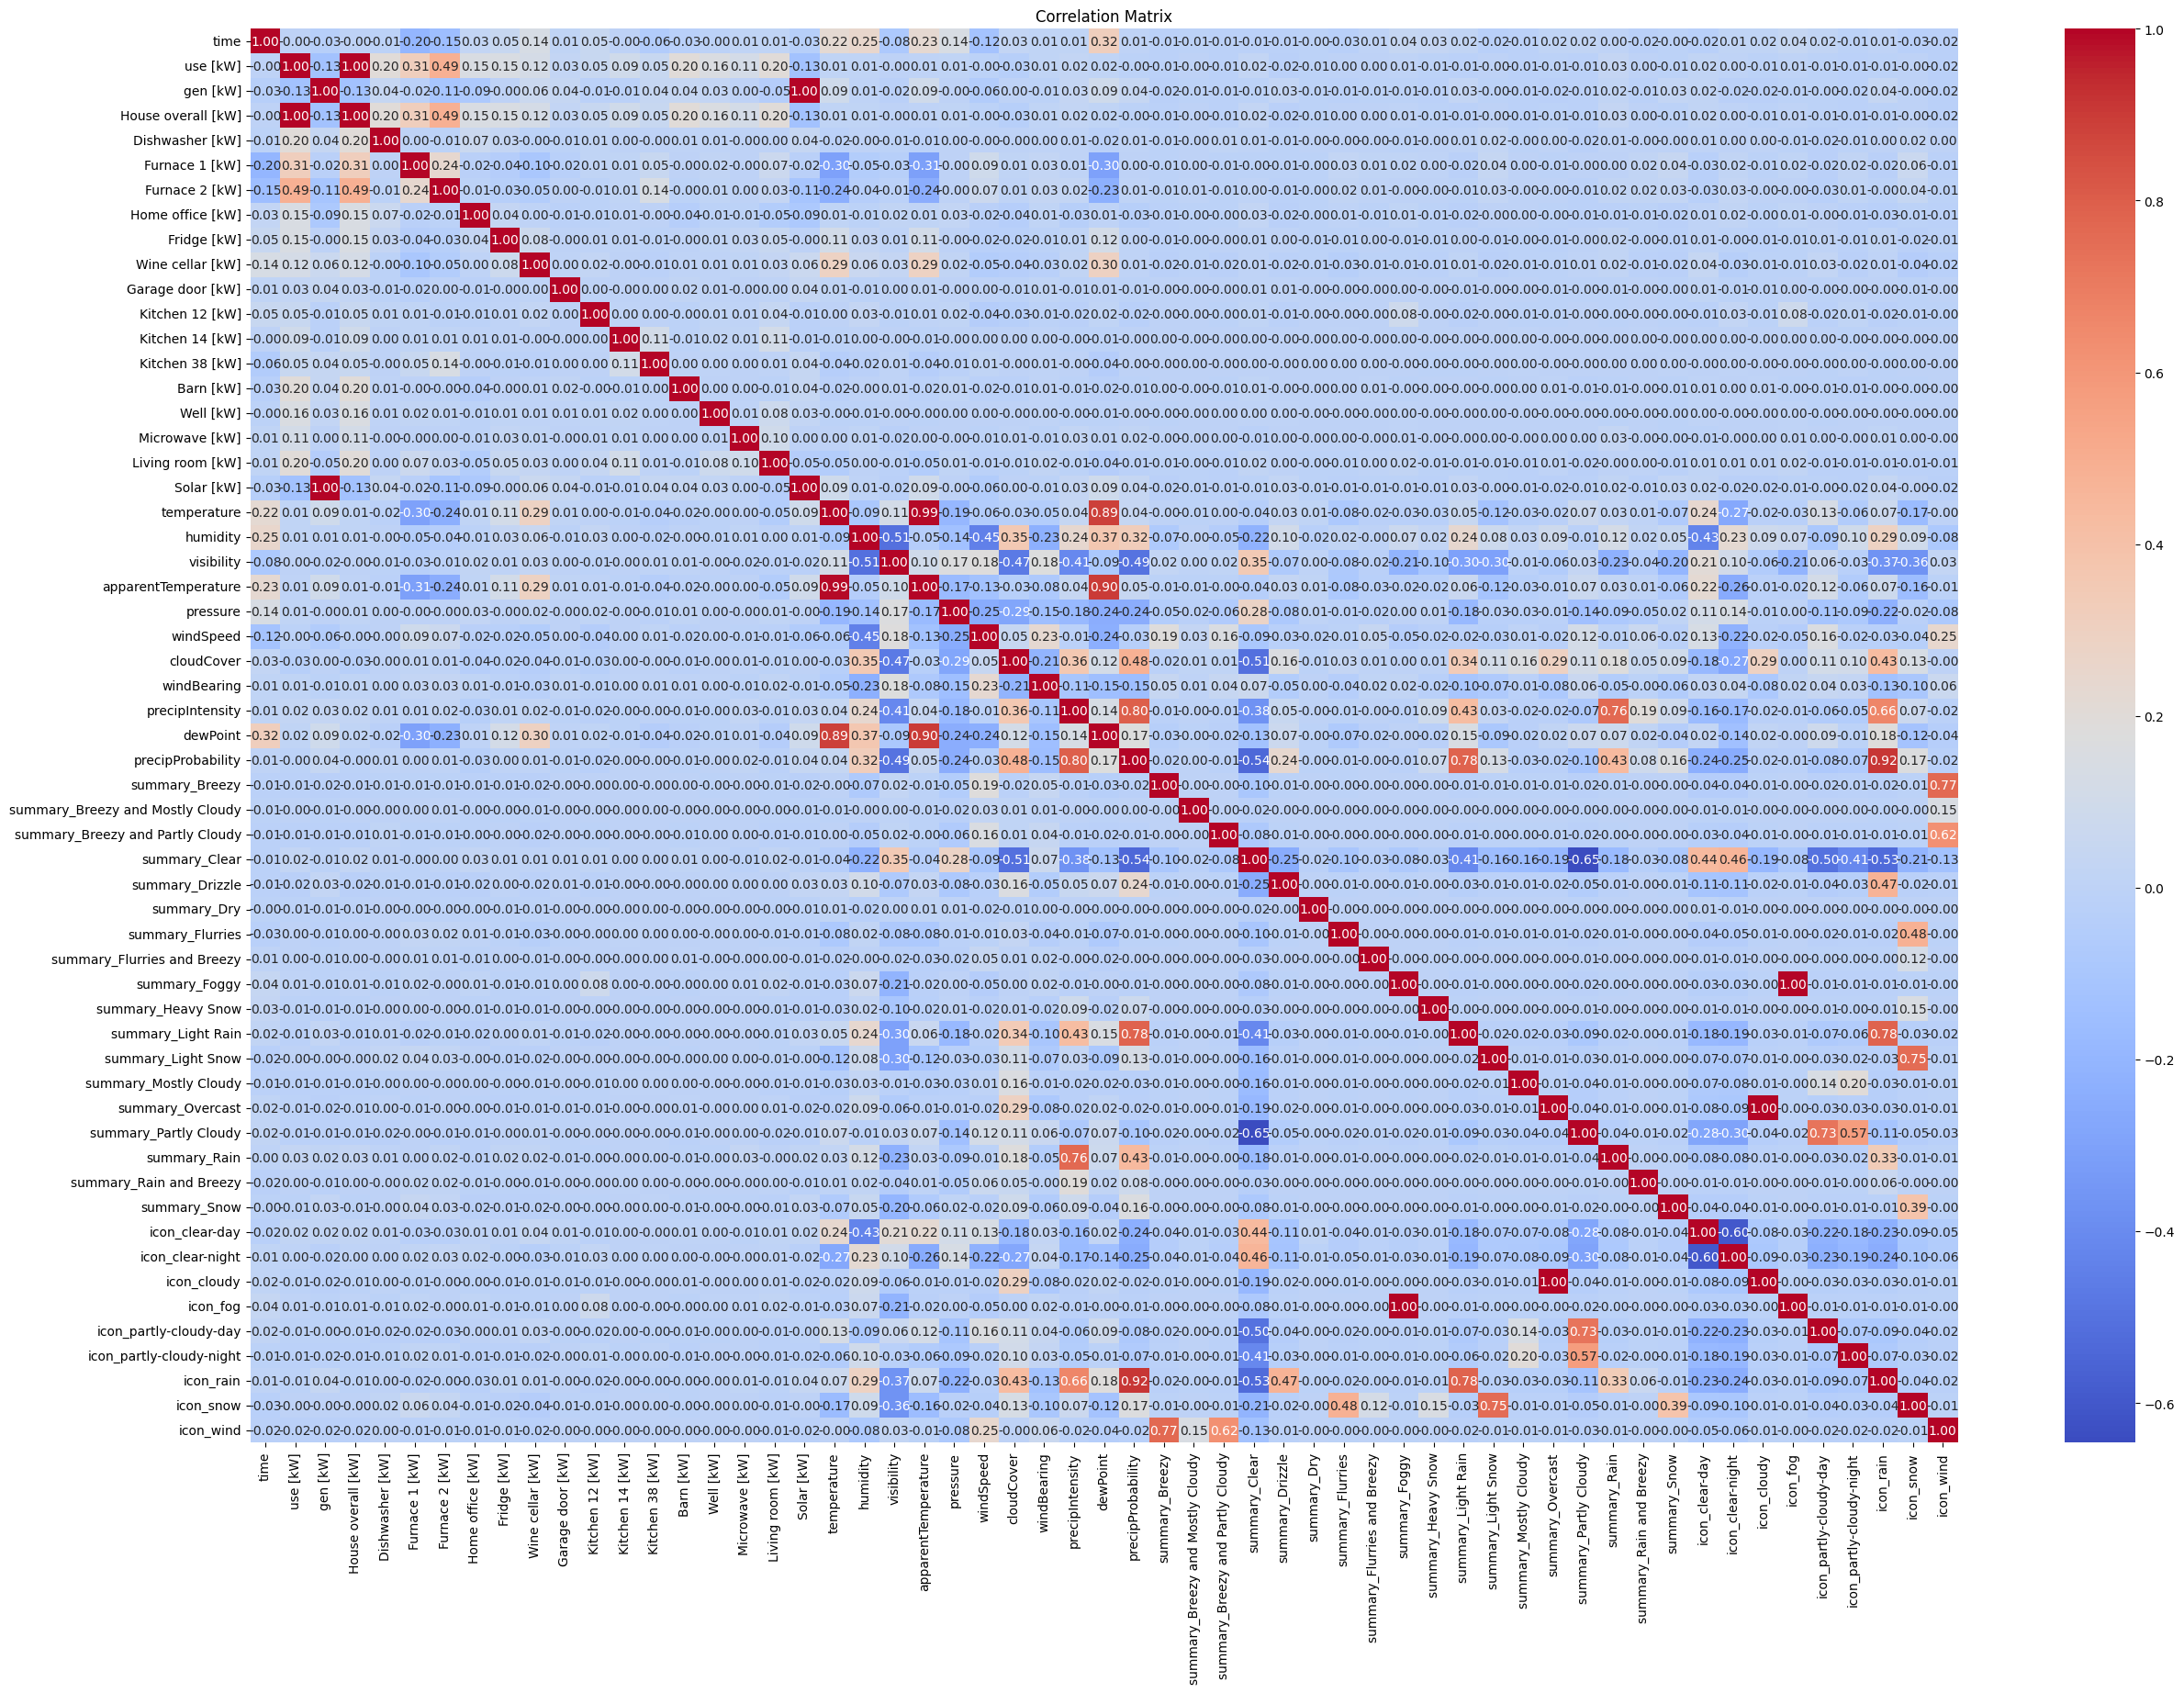

In [167]:
# Set the figure size for better readability
plt.figure(figsize=(30, 20))

# Compute the correlation matrix
corr_matrix = data_encoded.corr()

# Generate the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adding a title to the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

Check for Outliers using boxplots for numerical features

Boxplots provide a visual summary of one or more groups of numerical data through their quartiles useful for detecting outliers and understanding the distribution of the data.


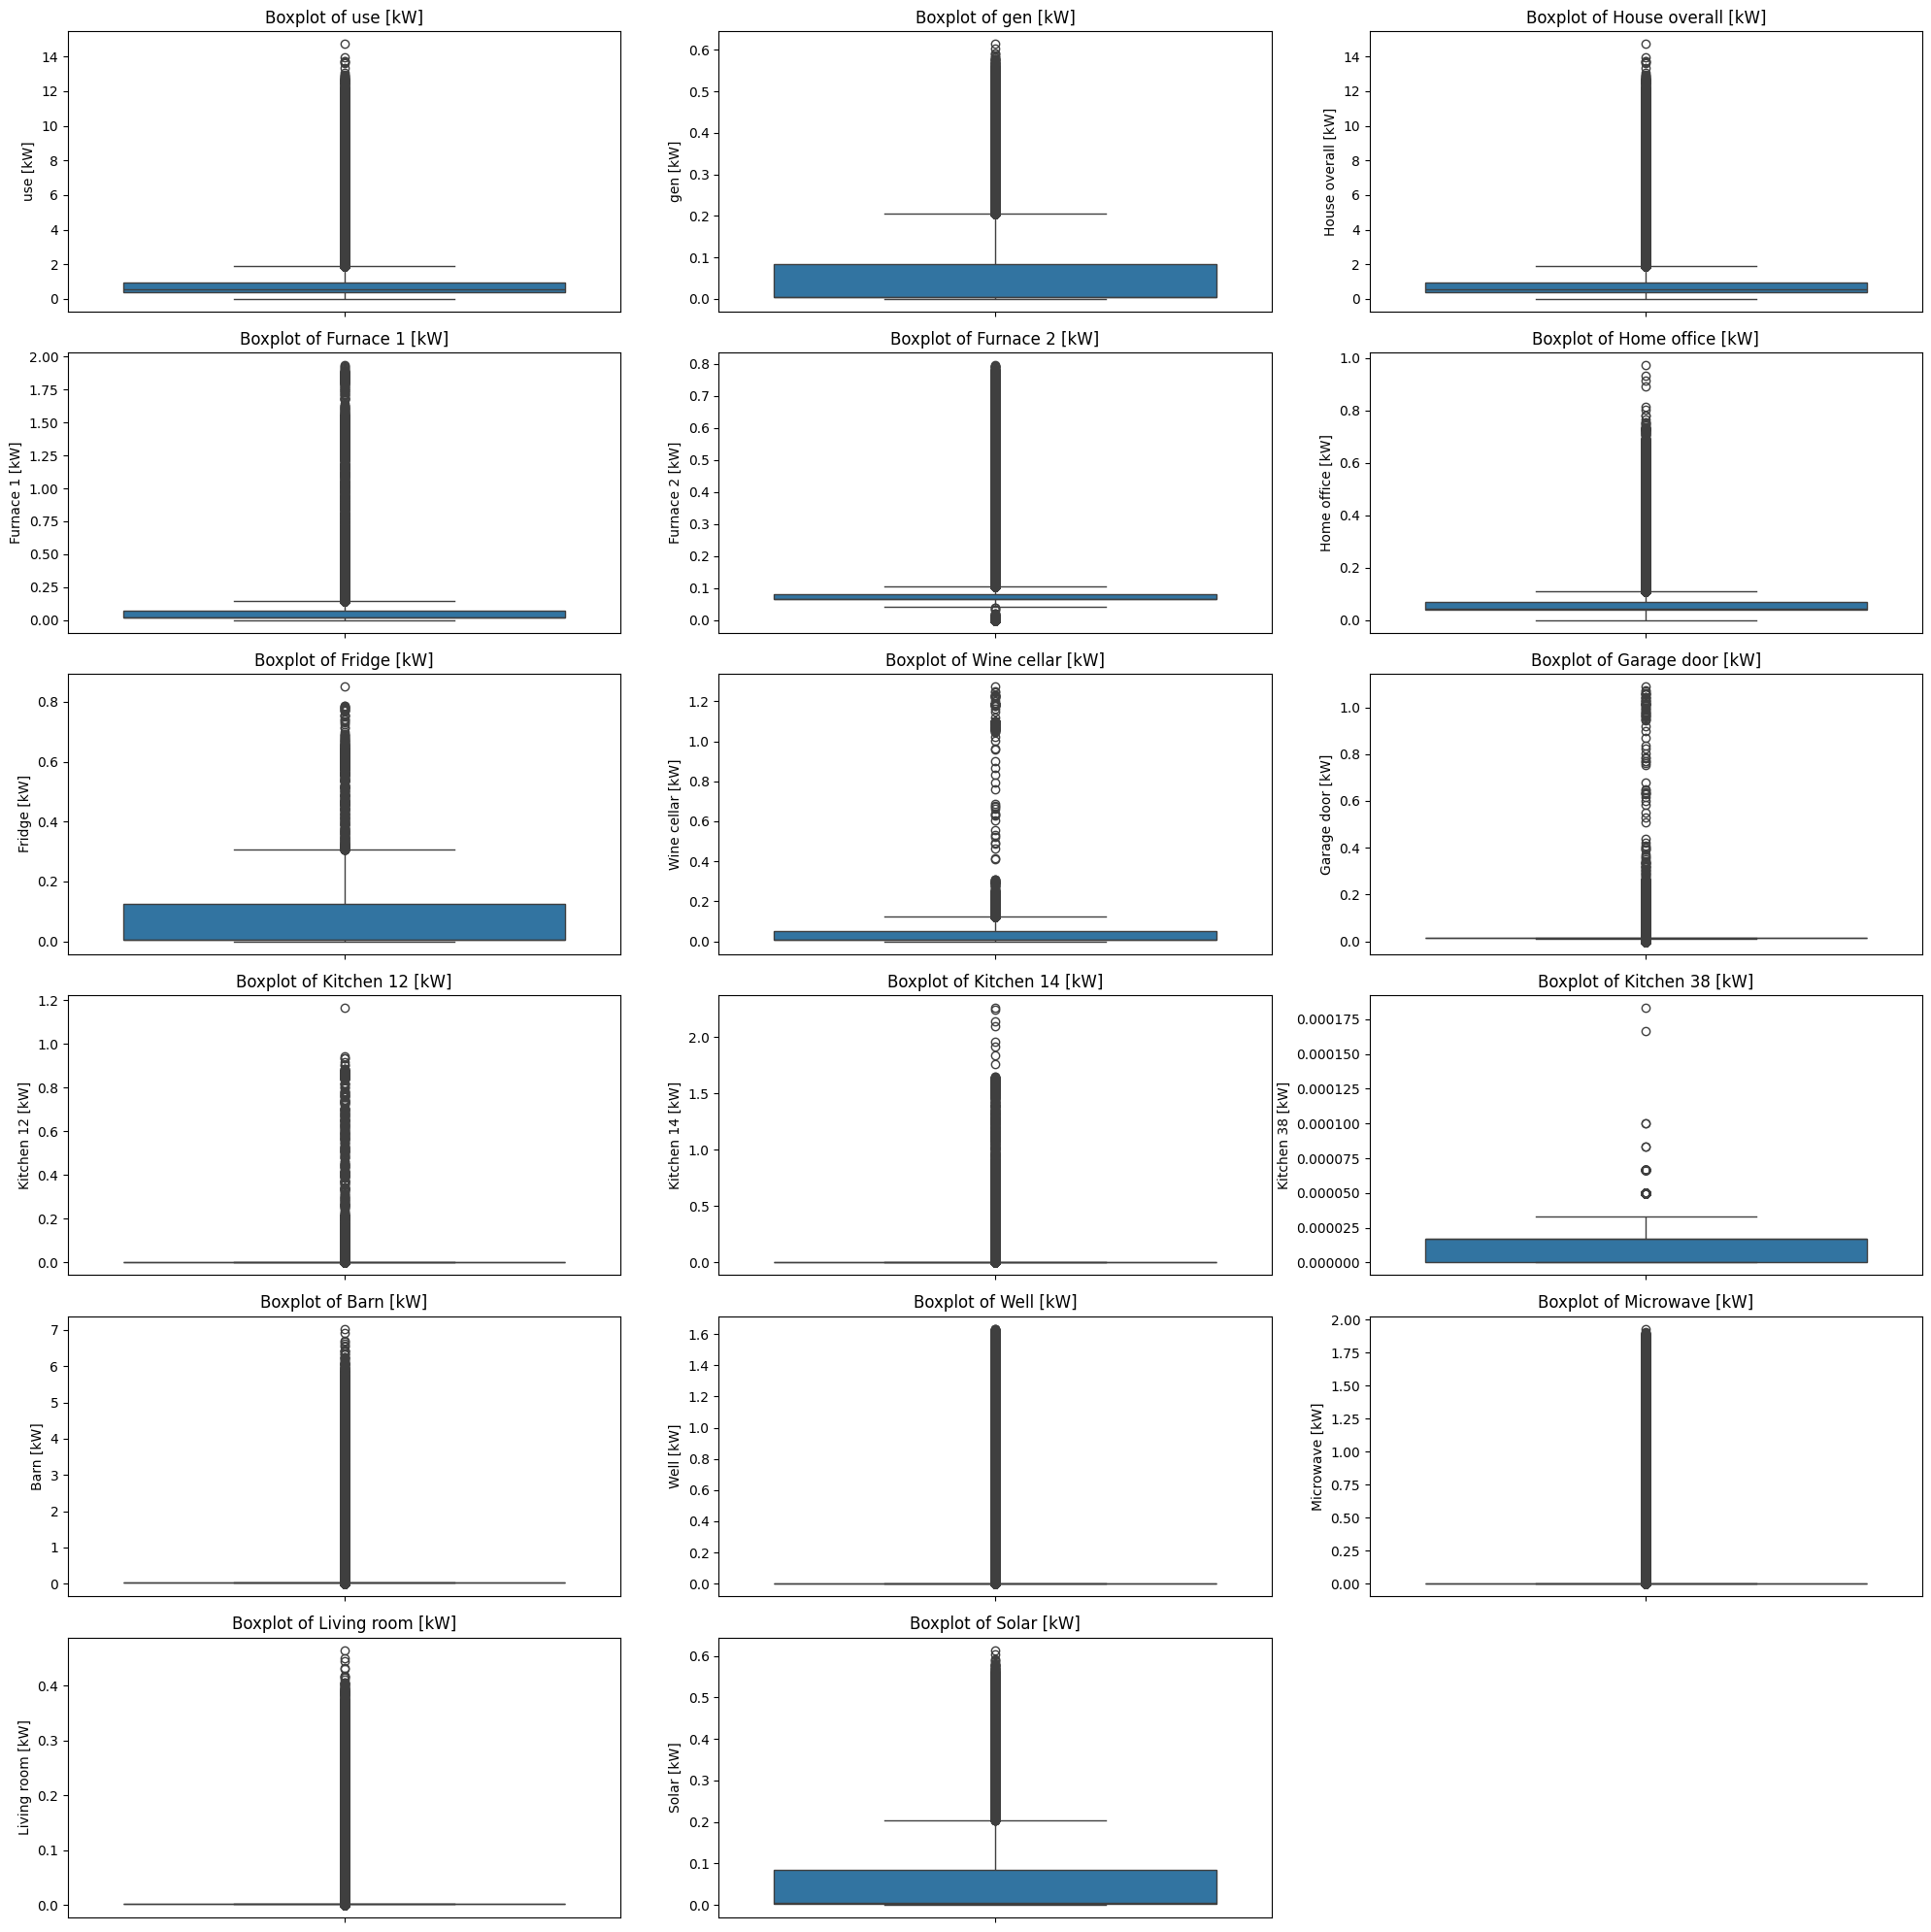

In [168]:
# List of numerical columns for which to create boxplots
numerical_columns = [
    'use [kW]', 'gen [kW]', 'House overall [kW]',
    'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]',
    'Fridge [kW]', 'Wine cellar [kW]', 'Garage door [kW]',
    'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]',
    'Barn [kW]', 'Well [kW]', 'Microwave [kW]',
    'Living room [kW]', 'Solar [kW]'
]

plt.figure(figsize=(20, 20))

# Loop through each numerical column and create a boxplot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(data=data_encoded[column])
    plt.title(f'Boxplot of {column}')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the boxplots
plt.show()


Function to remove outliers using IQR method

The Interquartile Range (IQR) method is used to remove outliers from a dataset. Outliers are defined as data points that fall below Q1 - 1.5xIQR or above Q3 + 1.5xIQR.

In [169]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # Filter the dataframe to remove outliers

# Remove outliers from numerical columns
# Loop through each numerical column and remove outliers using the IQR method defined above.
for column in numerical_columns:
    data_encoded = remove_outliers(data_encoded, column)

Verify the changes with boxplots

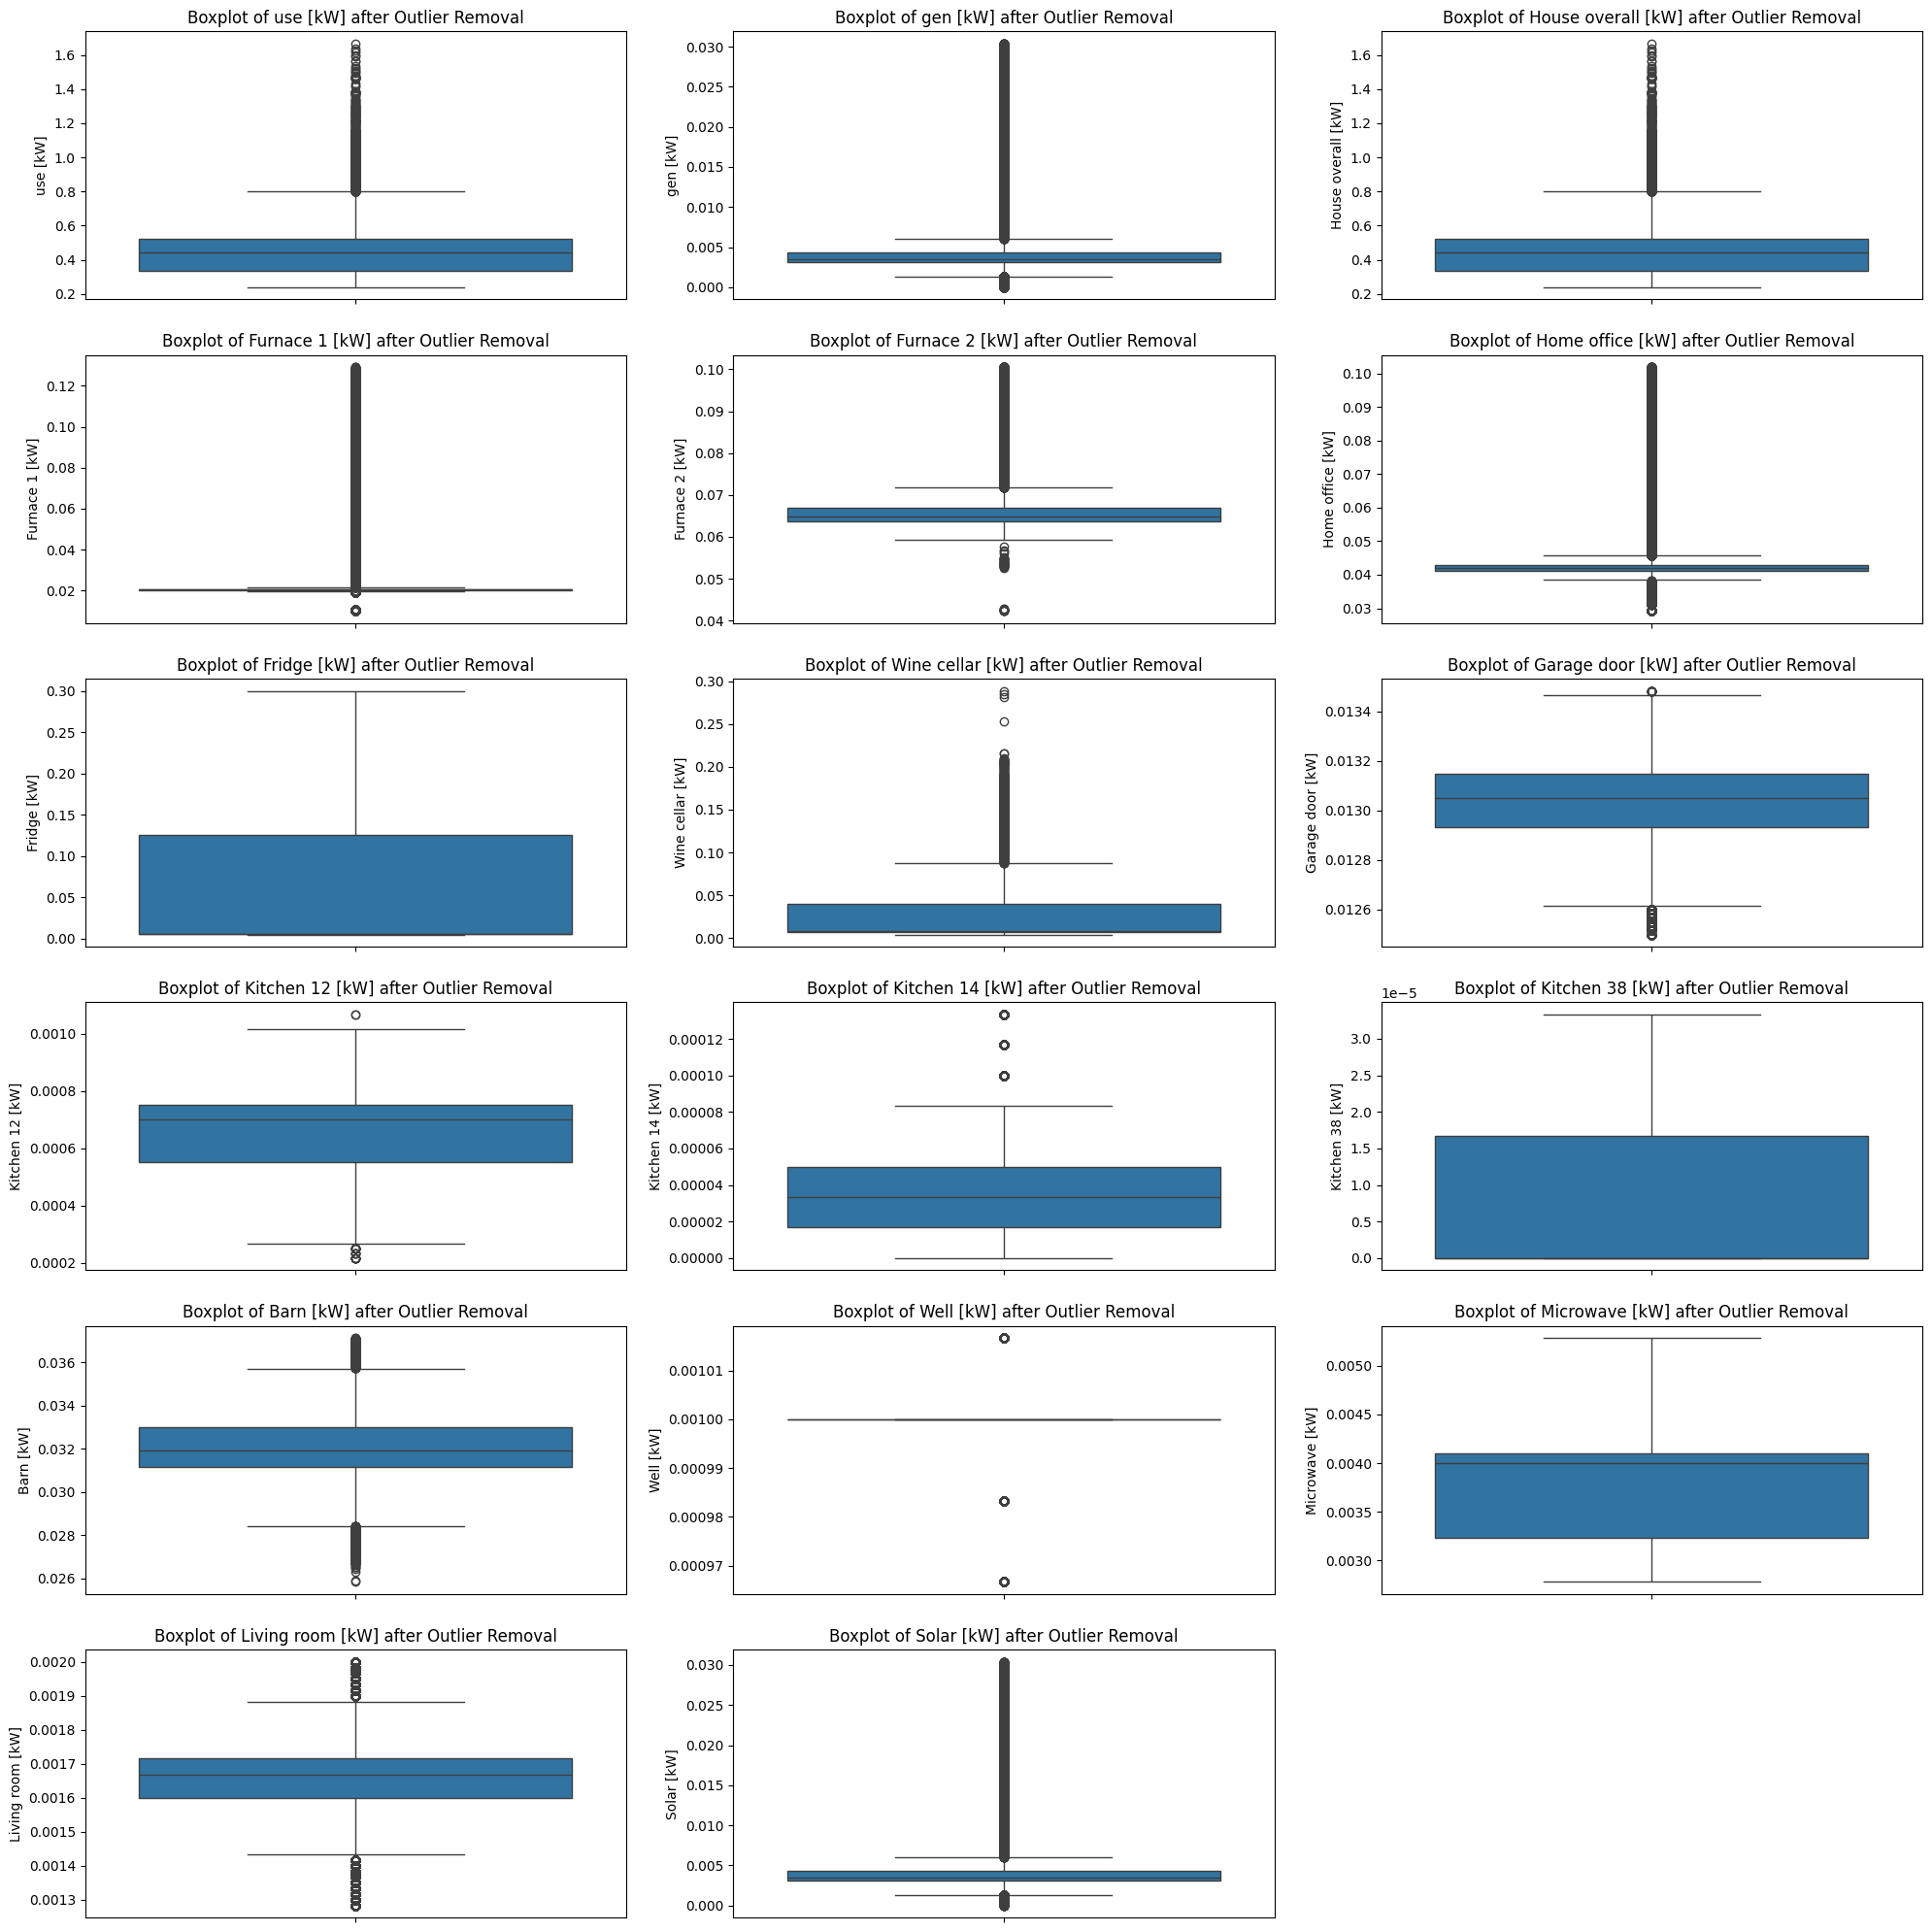

In [170]:
plt.figure(figsize=(20, 20))

# Loop through each numerical column and create a boxplot after outlier removal
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(data=data_encoded[column])
    plt.title(f'Boxplot of {column} after Outlier Removal')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the boxplots
plt.show()

Plot histograms for numerical columns after outlier removal

The 'kde' (Kernel Density Estimate) line helps to visualize the probability density function of the variable.

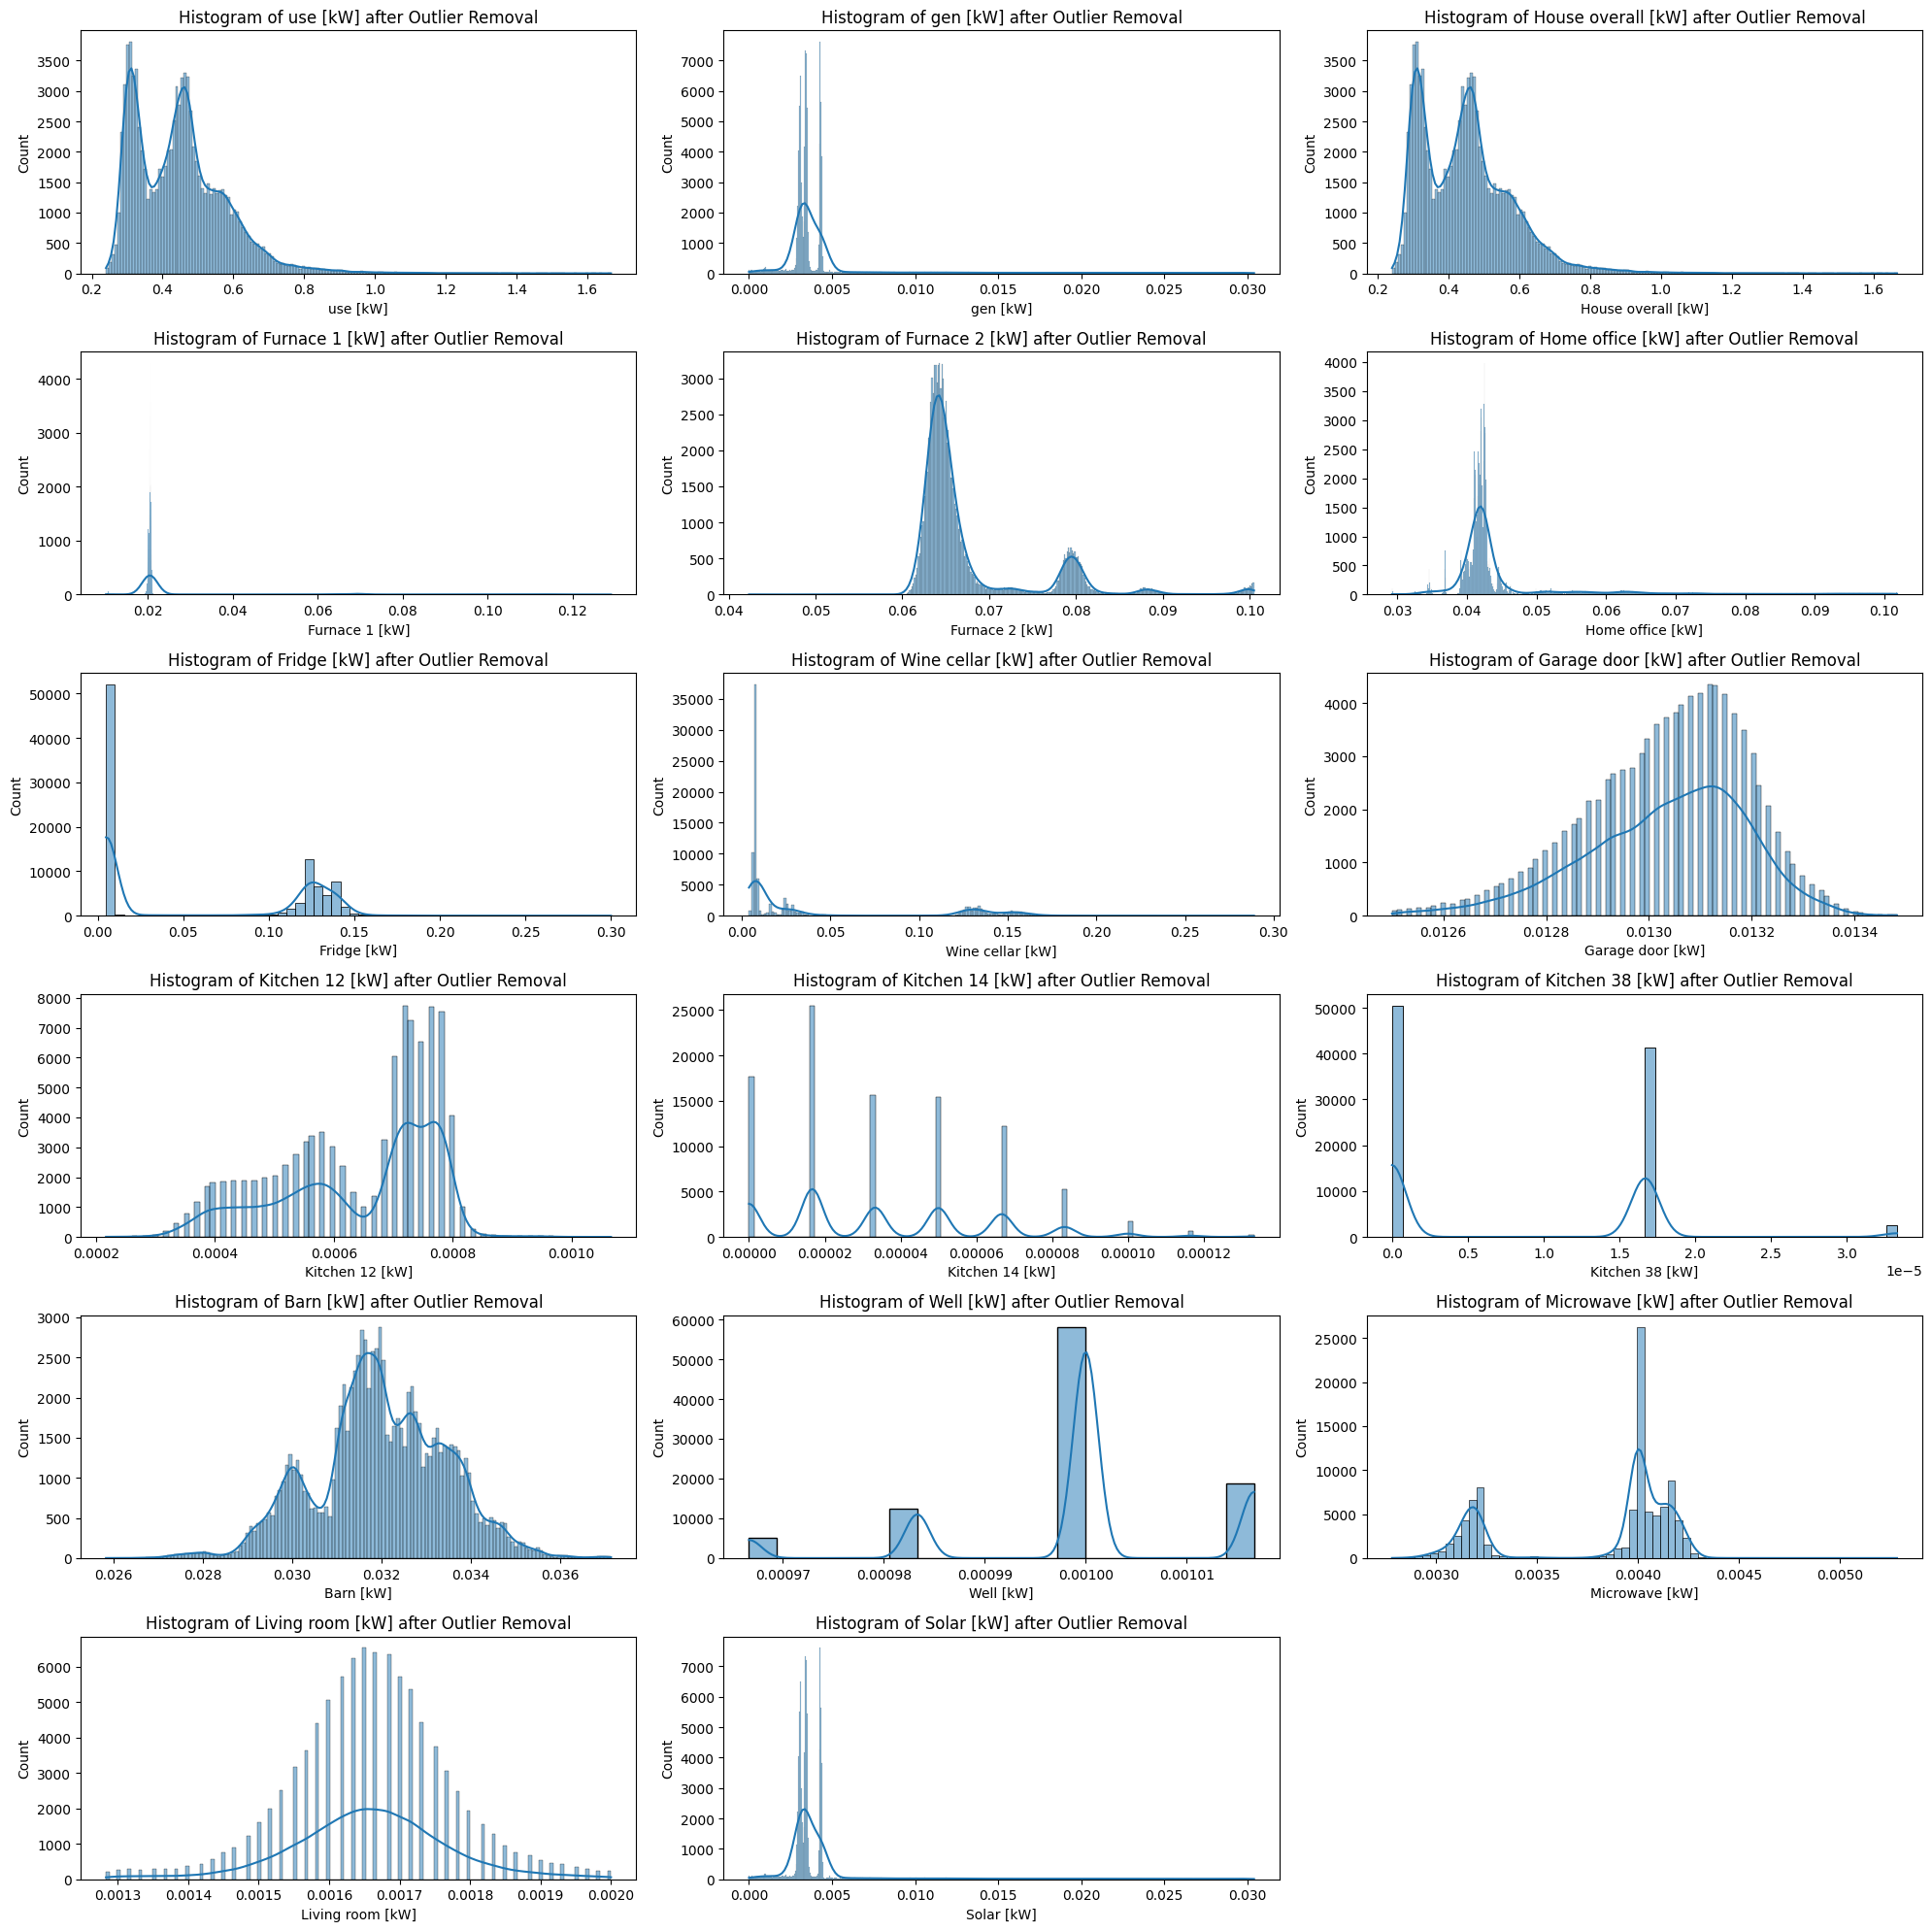

In [171]:
plt.figure(figsize=(20, 20))

# Loop through each numerical column and create a histogram after outlier removal
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(data_encoded[column], kde=True)
    plt.title(f'Histogram of {column} after Outlier Removal')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the histograms
plt.show()

Select relevant features and target variable that will be used for prediction and the target variable.


In [172]:
features = [
    'use [kW]', 'gen [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]',
    'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]', 'Garage door [kW]',
    'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
    'Microwave [kW]', 'Living room [kW]', 'Solar [kW]',
    'temperature', 'humidity', 'visibility', 'apparentTemperature',
    'pressure', 'windSpeed', 'cloudCover', 'windBearing',
    'precipIntensity', 'dewPoint', 'precipProbability',
    'summary_Breezy', 'summary_Breezy and Mostly Cloudy', 'summary_Breezy and Partly Cloudy',
    'summary_Clear', 'summary_Drizzle', 'summary_Dry', 'summary_Flurries',
    'summary_Flurries and Breezy', 'summary_Foggy', 'summary_Heavy Snow',
    'summary_Light Rain', 'summary_Light Snow', 'summary_Mostly Cloudy',
    'summary_Overcast', 'summary_Partly Cloudy', 'summary_Rain',
    'summary_Rain and Breezy', 'summary_Snow', 'icon_clear-day',
    'icon_clear-night', 'icon_cloudy', 'icon_fog', 'icon_partly-cloudy-day',
    'icon_partly-cloudy-night', 'icon_rain', 'icon_snow', 'icon_wind'
]

# Define the target variable for prediction
target = 'House overall [kW]'

Split the data into training and testing sets

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# The dataset is split into training (80%) and testing (20%) sets to evaluate the model's performance.
X = data_encoded[features]
y = data_encoded[target]

# Splitting the dataset into training and testing sets with a test size of 20% and a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the features using StandardScaler

In [174]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the testing data
X_test_scaled = scaler.transform(X_test)

## Model Creation

### Linear Regression

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}, R^2: {r2_lr}")

Linear Regression MSE: 3.3263964186909665e-32, R^2: 1.0


### Decision Tree Regressor

In [176]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt}, R^2: {r2_dt}")

Decision Tree MSE: 1.0831475374582304e-06, R^2: 0.9999376329618463


### Random Forest Regressor

In [177]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}, R^2: {r2_rf}")

Random Forest MSE: 4.1374433398894304e-07, R^2: 0.9999761768293133


### Support Vector Regressor

In [178]:
from sklearn.svm import SVR

# Support Vector Machine model
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"Support Vector Machine MSE: {mse_svm}, R^2: {r2_svm}")

Support Vector Machine MSE: 0.0014072623570540578, R^2: 0.918970609192721


### Feed Forward Neural Network

In [179]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

fnn_model = Sequential()

# Adding the input layer and the first hidden layer with 64 neurons and ReLU activation function
fnn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Adding the second hidden layer with 32 neurons and ReLU activation function
fnn_model.add(Dense(32, activation='relu'))

# Adding the output layer with 1 neuron (for regression task) and linear activation function
fnn_model.add(Dense(1, activation='linear'))

# Compile the model
# Using 'adam' optimizer and mean squared error (MSE) as the loss function
fnn_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [180]:
# Train the model
fnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_fnn = fnn_model.predict(X_test_scaled)

Epoch 1/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0557 - mse: 0.0557 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 2/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 3/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 4/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 5/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.5786e-04 - val_mse: 4.5786e-04
Epoch 6/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.2665e-04 - mse: 4.2665e-04 - val_loss: 7.9853e-04 - val_mse: 7.9853e-04
Epoch 7/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.5188e-04 - mse: 8.5188e-04 - val_loss: 2.4862e-04 - val_mse: 2.4862e-04
Epoch 8/50
1886/1886 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.2161e-04 - mse: 2.2161e-04 - val_loss: 1.1838e-04 - val_

In [181]:
# Evaluation
mse_fnn = mean_squared_error(y_test, y_pred_fnn)
r2_fnn = r2_score(y_test, y_pred_fnn)
print(f"Feedforward Neural Network MSE: {mse_fnn}, R^2: {r2_fnn}")

Feedforward Neural Network MSE: 1.0106259409051587e-05, R^2: 0.9994180871540044


## Model Inference

In [182]:
# Create a dictionary with the results
# This dictionary will store the evaluation metrics (MSE and R-squared) for each model

results = {
    'Model': [
        'Linear Regression',
        'Decision Tree',
        'Random Forest',
        'Support Vector Machine',
        'Feedforward Neural Network'
    ],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_svm, mse_fnn],
    'R-squared': [r2_lr, r2_dt, r2_rf, r2_svm, r2_fnn]
}

# Convert the dictionary to a DataFrame

results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                        Model           MSE  R-squared
0           Linear Regression  3.326396e-32   1.000000
1               Decision Tree  1.083148e-06   0.999938
2               Random Forest  4.137443e-07   0.999976
3      Support Vector Machine  1.407262e-03   0.918971
4  Feedforward Neural Network  1.010626e-05   0.999418


Visualize the MSE of different models

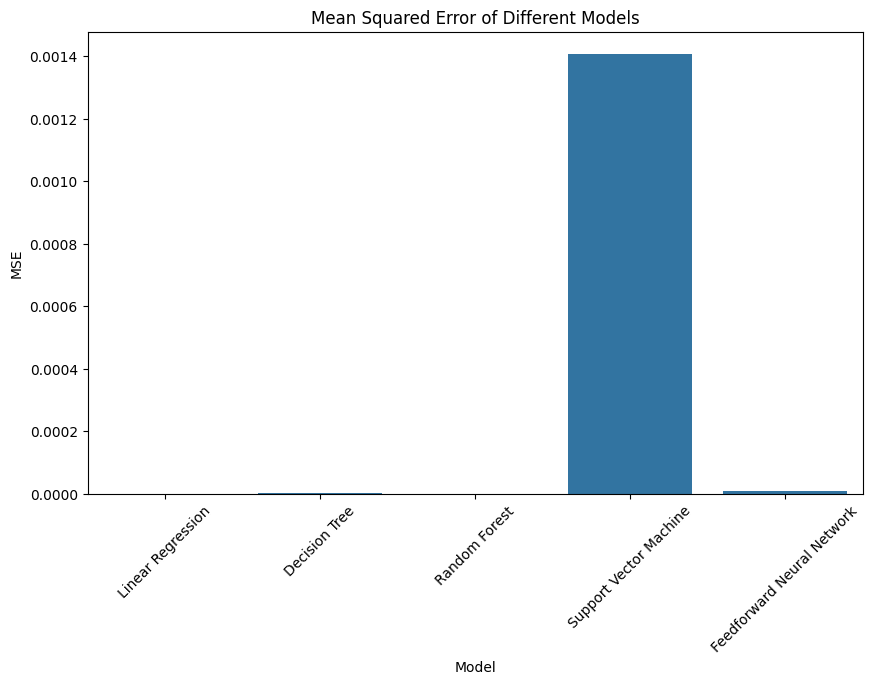

In [183]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Mean Squared Error of Different Models')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

Visualize the R-squared score of different models

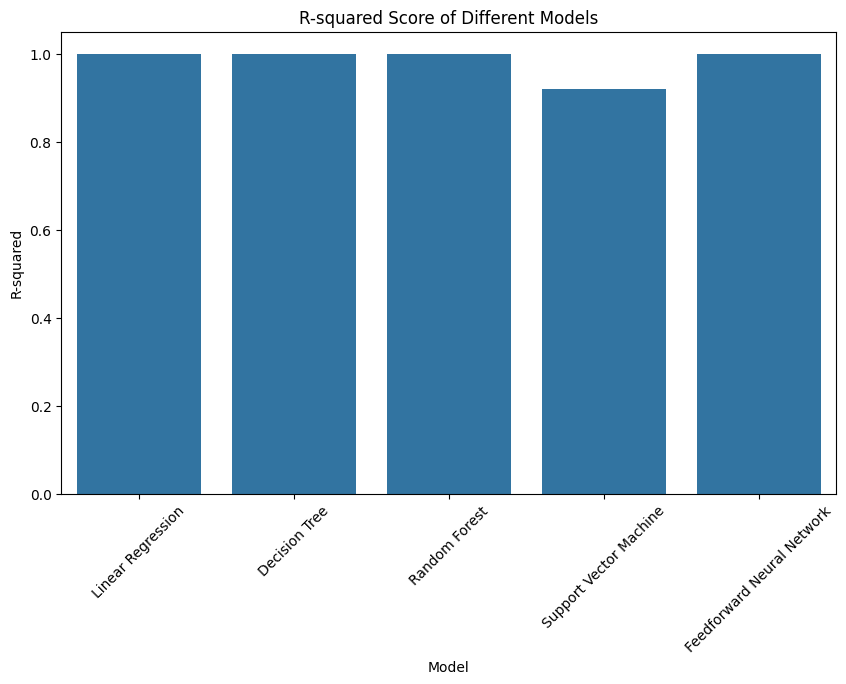

In [184]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=results_df)
plt.title('R-squared Score of Different Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.show()

Plot residuals for each model

Residual plots help visualize the difference between the observed and predicted values, which indicates the goodness of fit of the model.

The residuals should ideally be randomly distributed around zero.

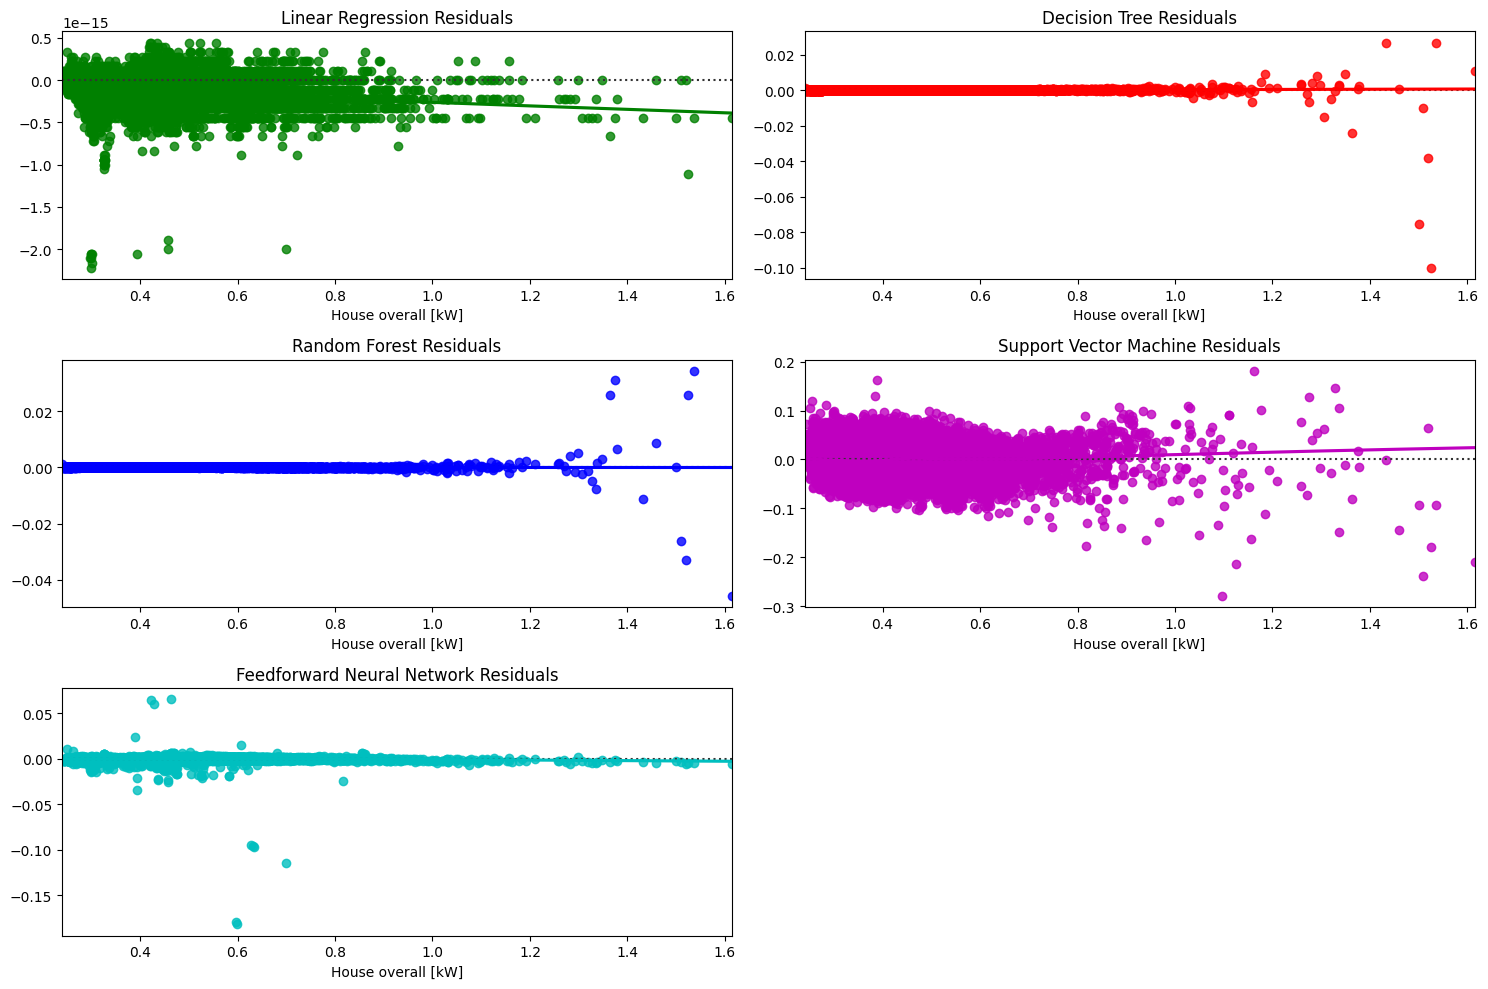

In [185]:
plt.figure(figsize=(15, 10))

# Linear Regression Residuals
plt.subplot(3, 2, 1)
sns.residplot(x=y_test, y=y_pred_lr, lowess=True, color="g")
plt.title('Linear Regression Residuals')

# Decision Tree Residuals
plt.subplot(3, 2, 2)
sns.residplot(x=y_test, y=y_pred_dt, lowess=True, color="r")
plt.title('Decision Tree Residuals')

# Random Forest Residuals
plt.subplot(3, 2, 3)
sns.residplot(x=y_test, y=y_pred_rf, lowess=True, color="b")
plt.title('Random Forest Residuals')

# Support Vector Machine Residuals
plt.subplot(3, 2, 4)
sns.residplot(x=y_test, y=y_pred_svm, lowess=True, color="m")
plt.title('Support Vector Machine Residuals')

# Feedforward Neural Network Residuals
# The predictions from the neural network need to be flattened to match the shape of the y_test values
plt.subplot(3, 2, 5)
sns.residplot(x=y_test, y=y_pred_fnn.flatten(), lowess=True, color="c")
plt.title('Feedforward Neural Network Residuals')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the residual plots
plt.show()

### Feature Selection Using Principal Component Analysis.

Here, we find out using which features / data combination can get the best prediction for the energy consumption for some specific appliances using PCA.

In [186]:
# Define the target variable for a specific appliance (e.g., 'Fridge [kW]')
target_fs = 'Fridge [kW]'

# Define potential features
features_fs = ['use [kW]', 'gen [kW]', 'House overall [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]',
            'Home office [kW]', 'Wine cellar [kW]', 'Garage door [kW]',
            'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
            'Microwave [kW]', 'Living room [kW]', 'Solar [kW]',
            'temperature', 'humidity', 'visibility', 'apparentTemperature',
            'pressure', 'windSpeed', 'cloudCover', 'windBearing',
            'precipIntensity', 'dewPoint', 'precipProbability',
            'summary_Breezy', 'summary_Breezy and Mostly Cloudy', 'summary_Breezy and Partly Cloudy',
            'summary_Clear', 'summary_Drizzle', 'summary_Dry', 'summary_Flurries',
            'summary_Flurries and Breezy', 'summary_Foggy', 'summary_Heavy Snow',
            'summary_Light Rain', 'summary_Light Snow', 'summary_Mostly Cloudy',
            'summary_Overcast', 'summary_Partly Cloudy', 'summary_Rain',
            'summary_Rain and Breezy', 'summary_Snow', 'icon_clear-day',
            'icon_clear-night', 'icon_cloudy', 'icon_fog', 'icon_partly-cloudy-day',
            'icon_partly-cloudy-night', 'icon_rain', 'icon_snow', 'icon_wind']

Apply PCA

In [187]:
# Split the data into training and testing sets
X_fs = data_encoded[features_fs]
y_fs = data_encoded[target_fs]
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_fs_scaled = scaler.fit_transform(X_train_fs)
X_test_fs_scaled = scaler.transform(X_test_fs)

In [188]:
from sklearn.decomposition import PCA

# Apply Principal Component Analysis (PCA)
# PCA is a dimensionality reduction technique that transforms the features into a set of linearly uncorrelated components.
# The parameter 'n_components=0.95' means we retain enough components to explain 95% of the variance in the data.

pca = PCA(n_components=0.95)

# Fit the PCA on the training data and apply the transformation to both the training and testing data
X_train_pca = pca.fit_transform(X_train_fs_scaled)
X_test_pca = pca.transform(X_test_fs_scaled)

Get the explained variance ratio

In [189]:
# The explained variance ratio indicates the proportion of the dataset's variance that is captured by each principal component.
explained_variance = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
print(f"Explained variance ratio by principal components: {explained_variance}")

# Print the number of principal components retained
print(f"Number of principal components: {pca.n_components_}")

Explained variance ratio by principal components: [0.09267139 0.06892085 0.05551496 0.0500956  0.04565378 0.04478567
 0.03978918 0.03739263 0.03703007 0.03472777 0.02731869 0.02450524
 0.02250547 0.02205663 0.02099964 0.02013589 0.0197265  0.01963953
 0.01900888 0.01885704 0.01861732 0.01856186 0.01855918 0.01854624
 0.01851581 0.01840137 0.01809155 0.01737086 0.01696456 0.01581307
 0.01367012 0.01310117 0.0123701  0.01203385]
Number of principal components: 34


In [190]:
lr_model_pca = LinearRegression()

# Fit the Linear Regression model on the PCA-transformed training data
lr_model_pca.fit(X_train_pca, y_train_fs)

LinearRegression()

Evaluation

In [191]:
from sklearn.metrics import mean_absolute_error

# Predict the target variable on the PCA-transformed test data using the trained Linear Regression model
y_pred_lr_pca = lr_model_pca.predict(X_test_pca)


# Calculate Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr_pca)

# Calculate R-squared (R^2) score
r2_lr = r2_score(y_test, y_pred_lr_pca)

# Calculate Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr_pca)

# Print the evaluation metrics for the Linear Regression model
print(f"Linear Regression with PCA - MSE: {mse_lr}, R^2: {r2_lr}, MAE: {mae_lr}")

Linear Regression with PCA - MSE: 0.16119163675975667, R^2: -8.281325592488338, MAE: 0.3902354405674023


Get the PCA loadings (principal component coefficients)

In [192]:
# The loadings represent the weight of each original feature in the principal components.
loadings = pca.components_

# Create a DataFrame to display the loadings in a readable format
# The columns represent the principal components (PC1, PC2, etc.), and the rows represent the original features.
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=features)

# Print the PCA loadings
print("PCA Loadings:")
print(loadings_df)

PCA Loadings:
                                       PC1       PC2       PC3       PC4  \
use [kW]                         -0.004879 -0.160942 -0.365709  0.370469   
gen [kW]                         -0.010217  0.000088 -0.006957 -0.022372   
Furnace 1 [kW]                   -0.004879 -0.160942 -0.365709  0.370469   
Furnace 2 [kW]                   -0.002848  0.152915 -0.029656  0.127872   
Home office [kW]                  0.001026  0.031183 -0.024134  0.053511   
Fridge [kW]                       0.002137 -0.004685 -0.100006  0.083149   
Wine cellar [kW]                  0.003269 -0.223013 -0.187899  0.128108   
Garage door [kW]                 -0.002783  0.171431  0.158421 -0.099003   
Kitchen 12 [kW]                   0.012667 -0.018378  0.203299 -0.292001   
Kitchen 14 [kW]                   0.000215 -0.101169 -0.189091  0.216272   
Kitchen 38 [kW]                  -0.001209 -0.006998  0.007817  0.001020   
Barn [kW]                         0.018646  0.141151  0.021201  0.025009  

Plot the heatmap of the PCA loadings

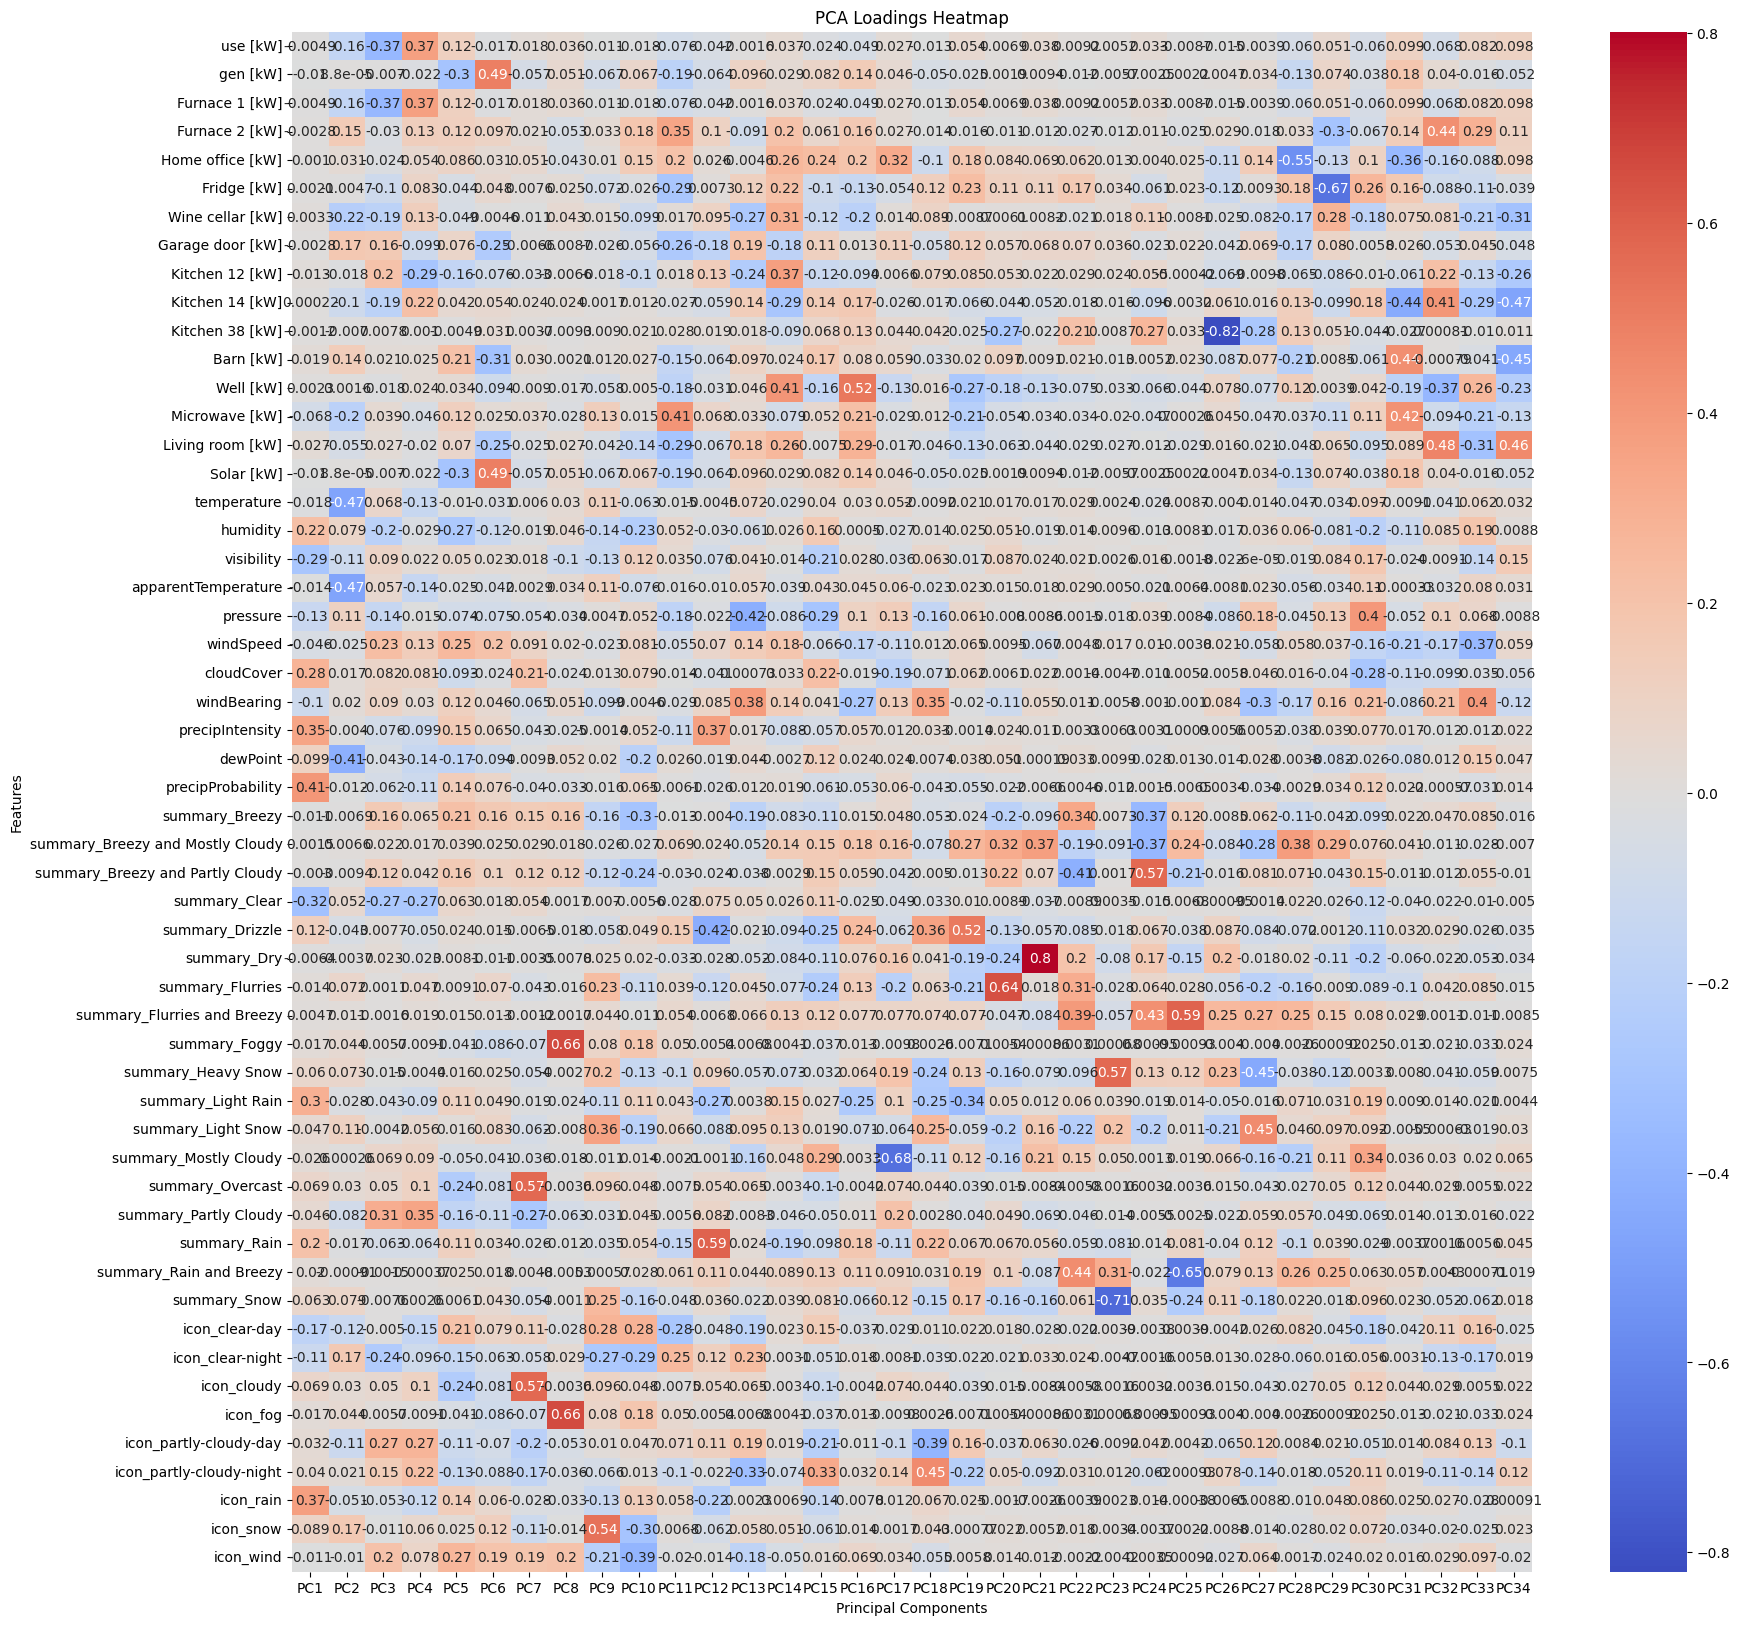

In [193]:
# This heatmap visualizes the loadings, showing the contribution of each feature to the principal components.
# A higher absolute value indicates a greater contribution to the corresponding principal component.

plt.figure(figsize=(20, 20))  # Set the figure size

# Generate the heatmap using seaborn
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')

# Add title and labels to the plot
plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')

# Display the heatmap
plt.show()

Get the top features for each principal component

In [194]:
# Number of principal components to consider
num_pcs = 2

# Get the top features for each principal component
# This identifies the features with the highest absolute loadings (contribution) to each principal component.
top_features = {}

for i in range(num_pcs):
    pc_name = f'PC{i+1}'
    # Get the top 10 features with the highest absolute loadings for the current principal component
    top_features[pc_name] = loadings_df[pc_name].abs().sort_values(ascending=False).head(10).index.tolist()

# Combine the top features from all principal components considered
# This creates a set of unique important features across the specified principal components
important_features = set(sum(top_features.values(), []))

# Print the top features from the first few principal components
print(f"Top features from the first {num_pcs} principal components:")
print(important_features)

Top features from the first 2 principal components:
{'icon_rain', 'temperature', 'visibility', 'summary_Rain', 'humidity', 'Furnace 1 [kW]', 'precipIntensity', 'summary_Clear', 'precipProbability', 'icon_snow', 'Wine cellar [kW]', 'icon_clear-night', 'apparentTemperature', 'Garage door [kW]', 'icon_clear-day', 'cloudCover', 'use [kW]', 'dewPoint', 'Microwave [kW]', 'summary_Light Rain'}
